In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from cont_blobs import *
import lsst.sims.featureScheduler.detailers as detailers
from lsst.sims.featureScheduler.utils import  schema_converter

In [2]:

nside = 32
per_night = True  # Dither DDF per night
nexp = 1  # All observations
mixed_pairs = True  # For the blob scheduler
camera_ddf_rot_limit = 75.

max_dither = 0.7

dither_detailer = detailers.Dither_detailer(per_night=per_night, max_dither=max_dither)
details = [detailers.Camera_rot_detailer(min_rot=-camera_ddf_rot_limit, max_rot=camera_ddf_rot_limit), dither_detailer]
ddfs = generate_dd_surveys(nside=nside, nexp=nexp, detailers=details)

greedy = gen_greedy_surveys(nside, nexp=nexp)
blobs = generate_blobs(nside, nexp=nexp)
surveys = [ddfs, blobs, greedy]

In [3]:
scheduler = Core_scheduler(surveys, nside=nside)
observatory = Model_observatory(nside=nside)



In [4]:
sco = schema_converter()
observations = sco.opsim2obs('cont_blobs_v1.4_10yrs.db')

In [5]:
np.where(observations['alt'] < np.radians(10))[0]

array([ 841888,  841918, 1018989, 1019023, 1543808, 1543838, 1711904,
       1711938, 1712536, 1712559])

In [6]:
observations['survey_id'][841888], observations['survey_id'][841918]

(27, 57)

In [7]:
# 
i = 841888-27
for obs in observations[0:i]:
    scheduler.add_observation(obs)

In [8]:
# Set the observatory to the correct state. Takes a while because it has to load the sky brightness file.
observatory.mjd = obs['mjd']
# Observatory starts parked, so need to send an expose command to slew to the correct position
temp = observatory.observe(obs)
# It took some time to make that slew, so reset the time again
observatory.mjd = obs['mjd']
should_match_obs, new_night = observatory.observe(obs)
should_match_obs == obs

True

In [26]:
conditions = observatory.return_conditions()

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:478: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


In [23]:
scheduler.update_conditions(conditions)
# r_obs = scheduler.request_observation()

In [9]:
# check that the queue is empty, then request a new one. Maybe try and execute it?
scheduler.queue

[]

In [28]:
for survey in scheduler.survey_lists[2]:
    print(np.max(survey.calc_reward_function(conditions)))

nan
nan
nan
nan


/Users/yoachim/gitRepos/sims_utils/python/lsst/sims/utils/healpyUtils.py:281: RuntimeWarning: All-NaN slice encountered
  indx = np.where(in_map[current_neighbors] == np.nanmax(in_map[current_neighbors]))[0]
/Users/yoachim/gitRepos/sims_utils/python/lsst/sims/utils/healpyUtils.py:284: UserWarning: Can not connect to any more pixels.
  warnings.warn('Can not connect to any more pixels.')


> /Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/surveys/surveys.py(305)generate_observations_rough()
-> mid_alt = (np.max(pointing_alt) - np.min(pointing_alt))/2.
(Pdb) len(self.best_fields)
32
(Pdb) self.nvisit_block
35
(Pdb) ordered_hp
array([ 9127,  9383,  9511,  9767,  9895, 10023, 10279, 10278, 10277,
       10150, 10152, 10024, 10151, 10149, 10148,  9896, 10153, 10405,
       10281, 10282, 10527, 10528, 10644, 10645, 10646, 10647, 10868,
       10757, 10643, 10759, 10869, 10870, 10974, 10758, 10525, 10761,
       10403, 10760, 10020, 10404, 10021, 10280, 10762, 10648,  9639,
       10407, 10529, 10022, 10406, 10867, 10526,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0])
(Pdb) hp.mollview(self.reward)


/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


(Pdb) plt.show()


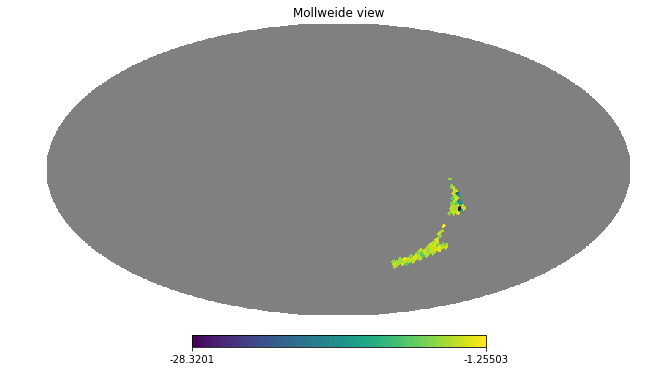

(Pdb) conditions.moonAlt
0.70700217669398613


In [ ]:
scheduler.update_conditions(conditions)
new_obs = scheduler.request_observation(conditions)

In [34]:
scheduler.queue

[array([ (0,  5.48064573, -0.92787389,  0.,  61224.19401387,  30., 'r',  6.00226508, 1,  0.,  0.,  0.,  0.,  0., 0,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 'blob, ri, a', -1, 1, 1,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.)],
       dtype=[('ID', '<i8'), ('RA', '<f8'), ('dec', '<f8'), ('mjd', '<f8'), ('flush_by_mjd', '<f8'), ('exptime', '<f8'), ('filter', '<U1'), ('rotSkyPos', '<f8'), ('nexp', '<i8'), ('airmass', '<f8'), ('FWHM_500', '<f8'), ('FWHMeff', '<f8'), ('FWHM_geometric', '<f8'), ('skybrightness', '<f8'), ('night', '<i8'), ('slewtime', '<f8'), ('visittime', '<f8'), ('slewdist', '<f8'), ('fivesigmadepth', '<f8'), ('alt', '<f8'), ('az', '<f8'), ('pa', '<f8'), ('clouds', '<f8'), ('moonAlt', '<f8'), ('sunAlt', '<f8'), ('note', '<U40'), ('field_id', '<i8'), ('survey_id', '<i8'), ('block_id', '<i8'), ('lmst', '<f8'), ('rotTelPos', '<f8'), ('moonAz', '<f8'), ('sunAz', '<f8'), ('sunRA', '<f8'), ('sunDec', '<f8'), ('moonRA', '<f8'), ('moonDec', '<f8'), ('moonDist',